# Titanic survived Project

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [3]:
df_train = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [4]:
df_train.head()  #First five rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis(EDA)

In [5]:
#checking the dimension of the dataset
df_train.shape

(891, 12)

This database contains 891 rows and 12 columns.

In [6]:
#getting the information from the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Checking Data type of Columns
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# checking for the missing values
df_train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

From the above it Seems like Cabin, Age and Embarked colummns have missing data.

## Statistical analysis of the dataset

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Categorical variables

Categorical variables in our dataset are Sex, Pclass and Embarked.

### Analysis of 'Sex' column

In [11]:
# Value counts of the sex column
df_train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

In [12]:
# Mean of survival by sex

df_train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

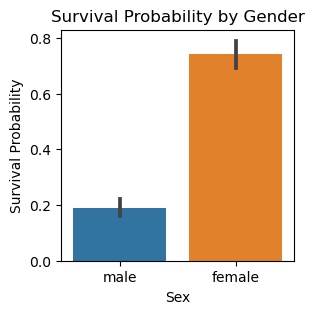

In [16]:
#visualization
plt.figure(figsize=(3,3))
sns.barplot(x = 'Sex', y ='Survived', data = df_train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')


From above it seems like female survival rate is higher as compared to male.

### Analysis of 'Pclass' column

In [17]:
# Value counts of the Pclass column 

df_train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
# Mean of survival by passenger class

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

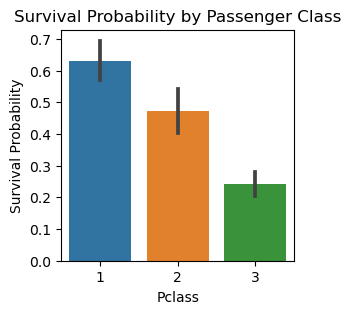

In [21]:
#visualization
plt.figure(figsize=(3,3))
sns.barplot(x = 'Pclass', y ='Survived', data = df_train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')


From above it seems like Survival probability decrease with passenger class, may be first class passengers are prioritised during evacuation process.

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

<Figure size 300x300 with 0 Axes>

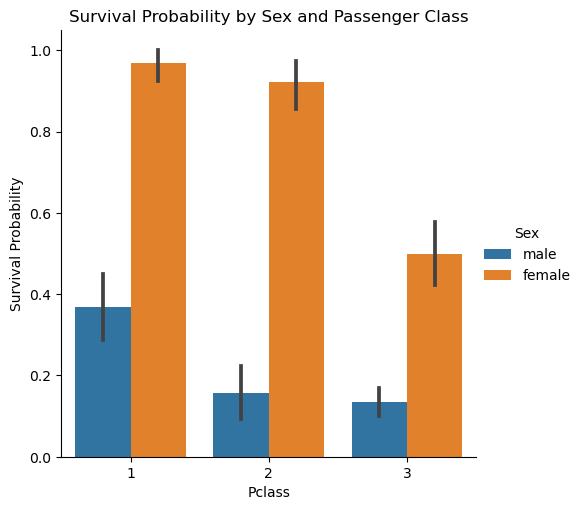

In [24]:
# Survival by gender and passenger class
plt.figure(figsize=(3,3))
g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df_train, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

### Analysis of 'Embarked' column 

In [25]:
# Value counts of the Embarked column 

df_train['Embarked'].value_counts(dropna = False)


S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Two missing values in the Embarked column

In [26]:
# Mean of survival by point of embarkation

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

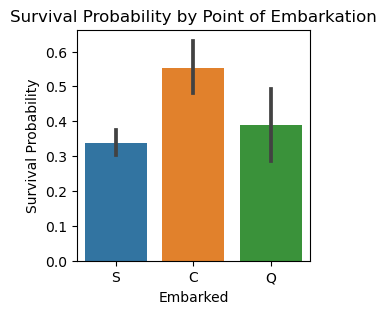

In [28]:
#visualization
plt.figure(figsize=(3,3))
sns.barplot(x = 'Embarked', y ='Survived', data = df_train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

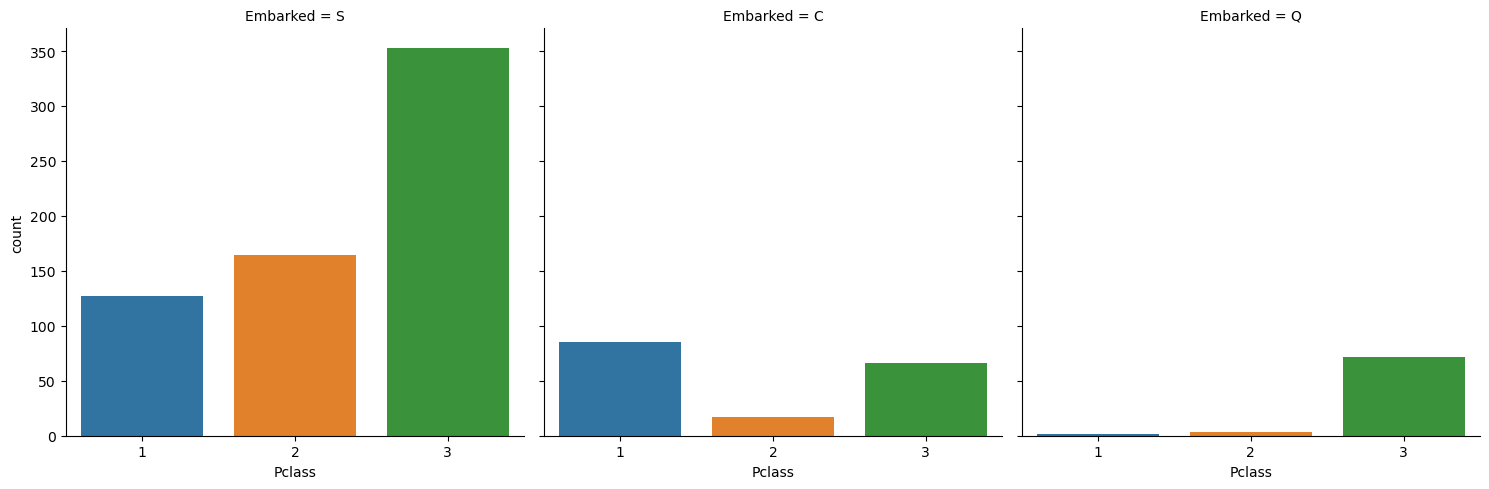

In [33]:
sns.factorplot('Pclass', col = 'Embarked', data = df_train, kind = 'count')

Location S has the most third class passengers whereas location C has the most first class passengers. 

In [35]:
def detect_outliers(df, n, features):
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(df_train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [40]:
# Drop outliers and reset index

print("Before: {} rows".format(len(df_train)))
df_train = df_train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(df_train)))

Before: 881 rows
After: 871 rows


## Numerical variables correlation with survival

<AxesSubplot:>

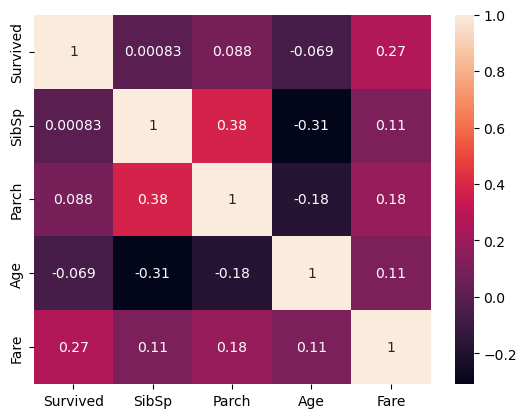

In [41]:
sns.heatmap(df_train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True)


### Analysis of 'SibSp' column 

In [42]:
# Value counts of the SibSp column 

df_train['SibSp'].value_counts(dropna = False)

0    601
1    207
2     27
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [43]:
# Mean of survival by SibSp

df_train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.536232
2,2,0.444444
0,0,0.344426
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

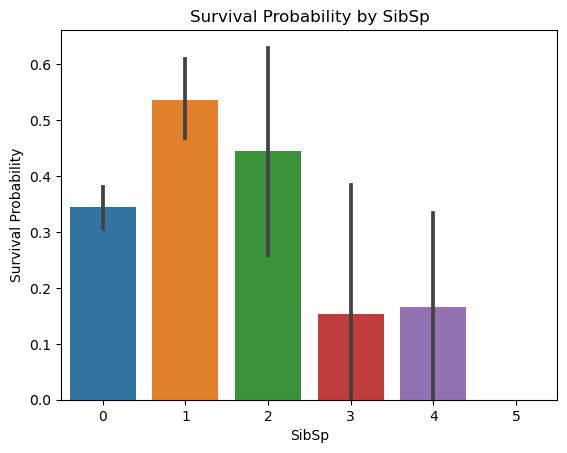

In [44]:
sns.barplot(x = 'SibSp', y ='Survived', data = df_train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

### Analysis of 'Parch' column

In [45]:
# Value counts of the Parch column 

df_train['Parch'].value_counts(dropna = False)

0    671
1    116
2     69
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [46]:
# Mean of survival by Parch

df_train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.543103
2,2,0.536232
0,0,0.344262
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

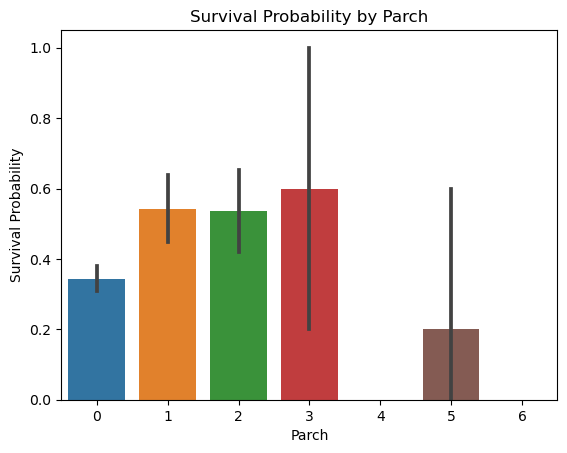

In [48]:
sns.barplot(x = 'Parch', y ='Survived', data = df_train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

### Analysis of 'Age' column

In [49]:
# Null values in Age column 

df_train['Age'].isnull().sum()

168

Text(0.5, 1.0, 'Passenger Age Distribution')

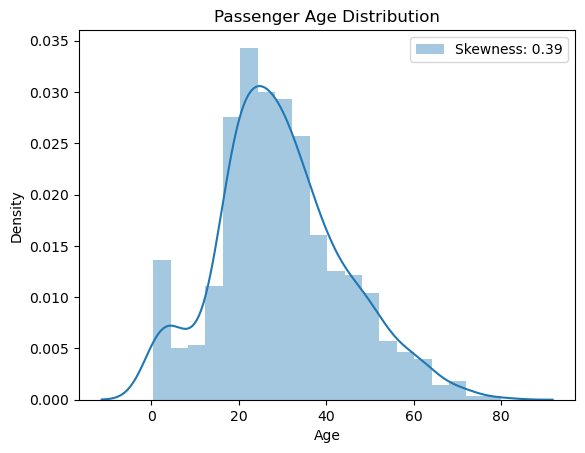

In [50]:
# Passenger age distribution

sns.distplot(df_train['Age'], label = 'Skewness: %.2f'%(df_train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

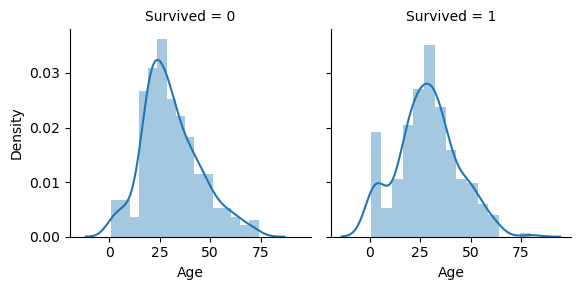

In [51]:
# Age distribution by survival

g = sns.FacetGrid(df_train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

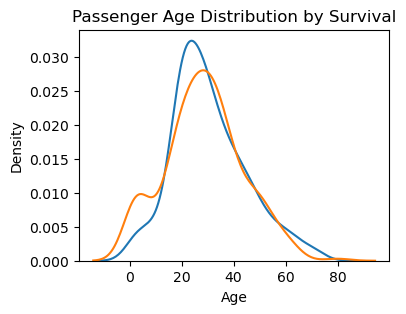

In [56]:
plt.figure(figsize=(4,3))
sns.kdeplot(df_train['Age'][df_train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(df_train['Age'][df_train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

### Analysis of 'Fare' column

In [57]:
# Null values of Fare column 

df_train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

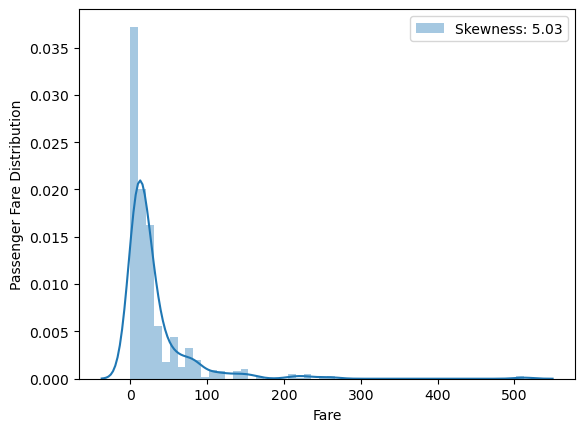

In [59]:
# Passenger fare distribution

sns.distplot(df_train['Fare'], label = 'Skewness: %.2f'%(df_train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

# Data preprocessing

### Drop and fill missing values

In [65]:
# Missing values in training set 

df_train.isnull().sum().sort_values(ascending = False)

Age            168
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [66]:
# Compute the most frequent value of Embarked in training set

mode = df_train['Embarked'].dropna().mode()[0]
mode

'S'

In [67]:
# Fill missing value in Embarked with mode

df_train['Embarked'].fillna(mode, inplace = True)

In [68]:
# Missing values in the combined dataset

df_train.isnull().sum().sort_values(ascending = False)

Age            168
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [70]:
# Convert Sex into numerical values where 0 = male and 1 = female

df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})

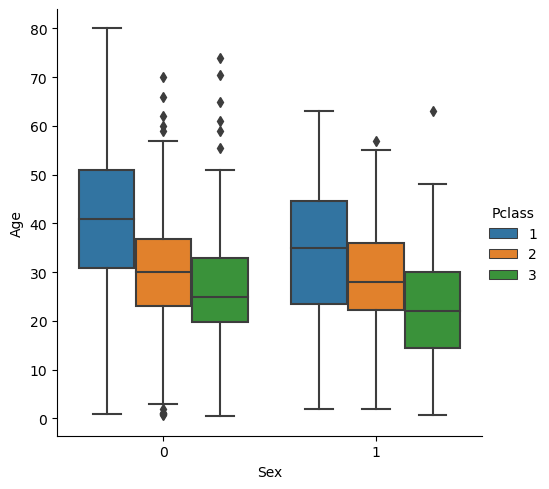

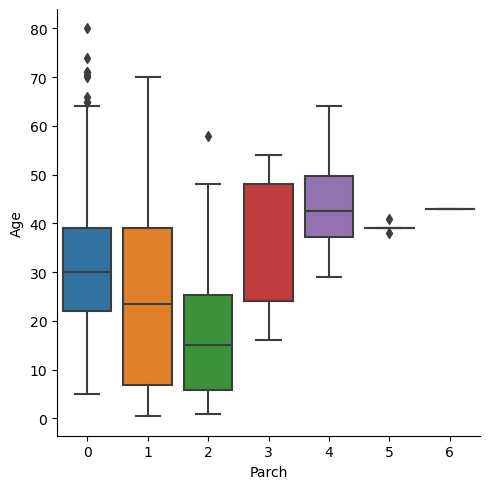

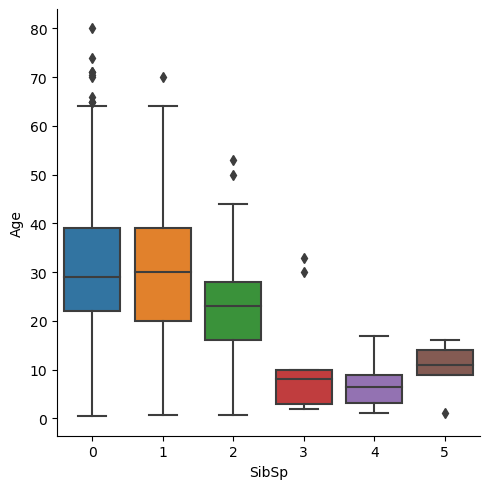

In [72]:
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = df_train)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = df_train)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = df_train)

<AxesSubplot:>

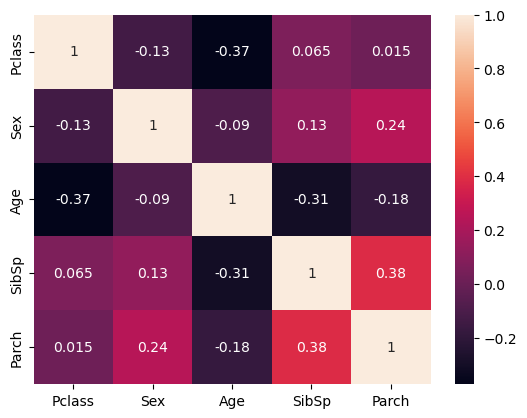

In [74]:
sns.heatmap(df_train.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True)

In [75]:
# Check number of missing ages 

age_nan_indices = list(df_train[df_train['Age'].isnull()].index)
len(age_nan_indices)

168

In [76]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = df_train['Age'].median()
    predict_age = df_train['Age'][(df_train['SibSp'] == df_train.iloc[index]['SibSp']) 
                                 & (df_train['Parch'] == df_train.iloc[index]['Parch'])
                                 & (df_train['Pclass'] == df_train.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        df_train['Age'].iloc[index] = median_age
    else:
        df_train['Age'].iloc[index] = predict_age

In [77]:
# Make sure there is no more missing ages 

df_train['Age'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger Fare Distribution')

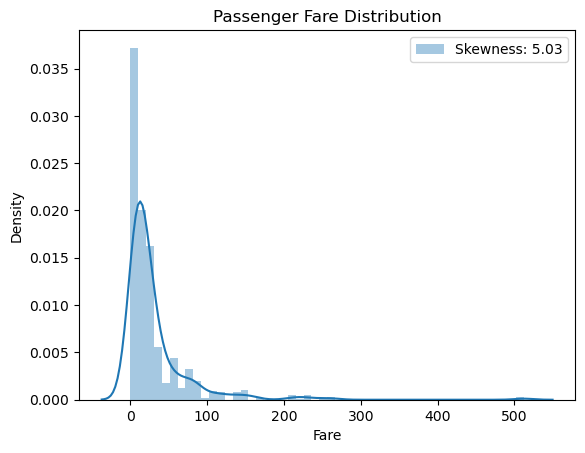

In [78]:
# Passenger fare distribution

sns.distplot(df_train['Fare'], label = 'Skewness: %.2f'%(df_train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [80]:
df_train['Fare'] = df_train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

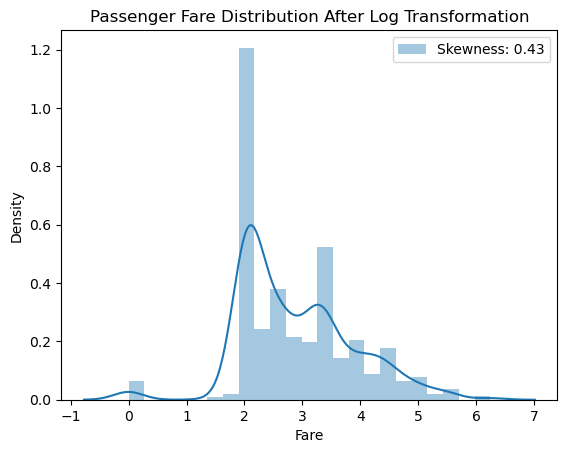

In [81]:
# Passenger fare distribution after log transformation

sns.distplot(df_train['Fare'], label = 'Skewness: %.2f'%(df_train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

## Feature engineering

In [82]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [83]:
# Get title from name

df_train['Title'] = [name.split(',')[1].split('.')[0].strip() for name in df_train['Name']]
df_train[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [84]:
# Value counts of Title

df_train['Title'].value_counts()

Mr              508
Miss            174
Mrs             124
Master           38
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [85]:
# Number of unique Title

df_train['Title'].nunique()

17

In [86]:
# Simplify title

df_train['Title'] = df_train['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
df_train['Title'] = df_train['Title'].replace(['Mlle', 'Ms'], 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')

<AxesSubplot:xlabel='Title', ylabel='count'>

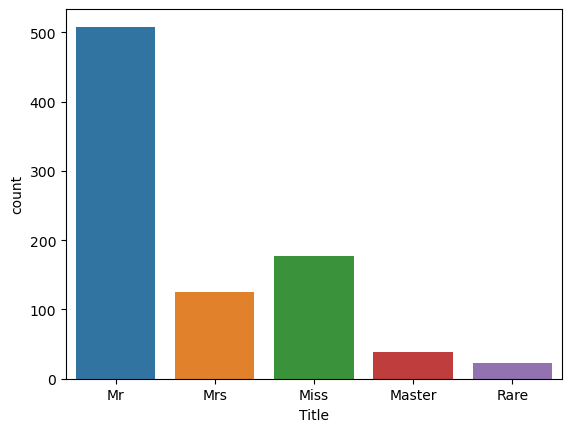

In [87]:
sns.countplot(df_train['Title'])

In [88]:
# Drop name column

df_train = df_train.drop('Name', axis = 1)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1,3,1,26.0,0,0,2.070022,S,Miss
3,4,1,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0,3,0,35.0,0,0,2.085672,S,Mr


In [89]:
# Calculate family size from SibSp and Parch

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [90]:
# Mean of survival by family size

df_train[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.565657
1,2,0.553459
6,7,0.333333
0,1,0.304511
4,5,0.200000
5,6,0.052632
7,8,0.000000


In [91]:
df_train['IsAlone'] = 0
df_train.loc[df_train['FamilySize'] == 1, 'IsAlone'] = 1

In [92]:
df_train[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.510324
1,1,0.304511


In [93]:
# Drop SibSp, Parch and FamilySize features from  dataframe

df_train = df_train.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.0,1.981001,S,Mr,0
1,2,1,1,1,38.0,4.266662,C,Mrs,0
2,3,1,3,1,26.0,2.070022,S,Miss,1
3,4,1,1,1,35.0,3.972177,S,Mrs,0
4,5,0,3,0,35.0,2.085672,S,Mr,1


In [95]:
# Create age bands and compute mean of survival by age bands

df_train['AgeBand'] = pd.cut(df_train['Age'], 5)
df_train[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.34, 16.336]",0.509615
1,"(16.336, 32.252]",0.341826
2,"(32.252, 48.168]",0.416667
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [96]:
# Assign ordinals to each age band 

df_train.loc[df_train['Age'] <= 16.136, 'Age'] = 0
df_train.loc[(df_train['Age'] > 16.136) & (df_train['Age'] <= 32.102), 'Age'] = 1
df_train.loc[(df_train['Age'] > 32.102) & (df_train['Age'] <= 48.068), 'Age'] = 2
df_train.loc[(df_train['Age'] > 48.068) & (df_train['Age'] <= 64.034), 'Age'] = 3
df_train.loc[df_train['Age'] > 64.034 , 'Age'] = 4

In [97]:
# Drop age band feature

df_train = df_train.drop('AgeBand', axis = 1)

In [98]:
# Age and Pclass data types 

df_train[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [99]:
# Convert ordinal Age into integer

df_train['Age'] = df_train['Age'].astype('int')
df_train['Age'].dtype

dtype('int32')

In [100]:
# Create Age*Class feature

df_train['Age*Class'] = df_train['Age'] * df_train['Pclass']
df_train[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [101]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,0,1,1.981001,S,Mr,0,3
1,2,1,1,1,2,4.266662,C,Mrs,0,2
2,3,1,3,1,1,2.070022,S,Miss,1,3
3,4,1,1,1,2,3.972177,S,Mrs,0,2
4,5,0,3,0,2,2.085672,S,Mr,1,6


In [102]:
# Encode Title and Embarked feature

df_train = pd.get_dummies(df_train, columns = ['Title'])
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Em')
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [103]:
# Divide Fare into four bands

df_train['FareBand'] = pd.cut(df_train['Fare'], 4)
df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.285992
2,"(3.119, 4.679]",0.515358
3,"(4.679, 6.239]",0.750000


In [104]:
# Assign ordinal to each fare band

df_train.loc[df_train['Fare'] <= 1.56, 'Fare'] = 0
df_train.loc[(df_train['Fare'] > 1.56) & (df_train['Fare'] <= 3.119), 'Fare'] = 1
df_train.loc[(df_train['Fare'] > 3.119) & (df_train['Fare'] <= 4.679), 'Fare'] = 2
df_train.loc[df_train['Fare'] > 4.679, 'Fare'] = 3

In [105]:
# Convert Fare into integer

df_train['Fare'] = df_train['Fare'].astype('int')

In [106]:
# Drop FareBand feature

df_train = df_train.drop('FareBand', axis = 1)

In [107]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [108]:
# Drop passenger ID column from and training set

df_train = df_train.drop('PassengerId', axis = 1)
df_train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [109]:
# Convert survived back to integer in the training set

df_train['Survived'] = df_train['Survived'].astype('int')
df_train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


##  Split train - test data

In [110]:
X_train = df_train.drop('Survived', axis = 1)
Y_train = df_train['Survived']

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)


X_train shape:  (871, 14)
Y_train shape:  (871,)


In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)


X_train shape:  (696, 14)
Y_train shape:  (696,)
X_test shape:  (175, 14)
Y_test shape:  (175,)


##  Logistic regression

In [112]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.9

##  Support vector machines

In [113]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.33

##  K-nearest neighbours (KNN)

In [114]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.05

##  Decision tree

In [115]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.78

### Conclusion

#### Decision tree is giving highest accuracy - 85.78